<a href="https://colab.research.google.com/github/j23-cs167/project-2-Venamax21/blob/main/Project2_vena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:VANLAL VENA

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. In this project, I am trying to find out how much effects do the other attributes such as age, blood pressure, glucose, insulin etc. have on determining a patient's Diabetes Pedigree Function.
Dataset from Kaggle https://www.kaggle.com/datasets/mathchi/diabetes-data-set

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

I first set up my target variable which is "PatientPedigreeFunction" and the predictor variables are everything else. I split the data to training and test data. I will be doing regression and used Mean squared error (MSE) and R^2 metrics.
I will be measuring non-normalized data first and then do normalized to find out the differences in the metric values because my target variable's numbers are all over the place, some are high and some are really low. 

I am also using dummy variables 

In [156]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import pandas as pd
import numpy
from sklearn import neighbors
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from itertools import product

path = '/content/drive/MyDrive/ColabNotebooks/CS167Datasets/diabetes.csv' 
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.isna().any() 

In [160]:
# data prep code 
predictors = data.columns.drop('DiabetesPedigreeFunction')
target= 'DiabetesPedigreeFunction'
train_data, test_data, train_sln, test_sln = \
        train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

# 3. Research

Put your code and your experiments here.

In [173]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
from sklearn.dummy import DummyRegressor
from sklearn import metrics

dummy_regr = DummyRegressor() # will always predict the average of the target column
#regression fit will train the training data 
dummy_regr.fit(train_data, train_sln) 
preds = dummy_regr.predict(test_data)
#Calculating the mean squared error and R^2
print('MSE: ', metrics.mean_squared_error(test_sln, preds))
print('R^2: ', metrics.r2_score(test_sln, preds))
print('ACTUAL                    \tPREDICTIONS')
for i in range(10):
  print(preds[i],"\t\t", test_sln.iloc[i])

MSE:  0.07789242892576764
R^2:  -0.03492072611821895
ACTUAL                    	PREDICTIONS
0.48215635179153093 		 0.614
0.48215635179153093 		 0.349
0.48215635179153093 		 0.536
0.48215635179153093 		 0.704
0.48215635179153093 		 0.364
0.48215635179153093 		 0.163
0.48215635179153093 		 0.251
0.48215635179153093 		 0.867
0.48215635179153093 		 0.528
0.48215635179153093 		 0.352


In [181]:
3#Create model
knn = neighbors.KNeighborsRegressor()
w_knn = neighbors.KNeighborsRegressor(weights = 'distance')
dt = tree.DecisionTreeRegressor(max_depth = 3)
R_forest = RandomForestRegressor()

4#Call fit()
knn.fit(train_data, train_sln)
w_knn.fit(train_data, train_sln)
dt.fit(train_data, train_sln)
R_forest.fit(train_data, train_sln)

5#Get Predictions
knn_Pred = knn.predict(test_data)
w_knn_Pred = w_knn.predict(test_data)
dt_Pred = dt.predict(test_data)
R_forest_Pred = R_forest.predict(test_data)


#6 Evaluate the model
from sklearn import metrics
#Mean Squared Error
print("KNN MSE:           ", metrics.mean_squared_error(knn_Pred, test_sln))
print("W_KNN MSE:         ", metrics.mean_squared_error(w_knn_Pred, test_sln))
print("Decision Tree MSE: ", metrics.mean_squared_error(dt_Pred, test_sln))
print("Forest MSE:        ", metrics.mean_squared_error(R_forest_Pred, test_sln))
#R^2 
print('KNN R^2:          ', metrics.r2_score(knn_Pred, test_sln))
print('W KNN R^2:        ', metrics.r2_score(w_knn_Pred, test_sln))
print('Decision Tree R^2:', metrics.r2_score(dt_Pred, test_sln))
print('Forest R^2:       ', metrics.r2_score(R_forest_Pred, test_sln))


KNN MSE:            0.100351627012987
W_KNN MSE:          0.10056881489359502
Decision Tree MSE:  0.07662879091232612
Forest MSE:         0.0881512472487013
KNN R^2:           -2.6294456592878532
W KNN R^2:         -2.4120186883744927
Decision Tree R^2: -12.329463808020668
Forest R^2:        -3.3786386677931075


In [182]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


In [186]:
#NORMALIZED DATAS
from sklearn.svm import SVC

3#Create model
knn = neighbors.KNeighborsRegressor()
w_knn = neighbors.KNeighborsRegressor( weights = 'distance')
dt = tree.DecisionTreeRegressor(max_depth = 3)
R_forest = RandomForestRegressor()

4#Call fit()
knn.fit(train_data_normalized, train_sln)
w_knn.fit(train_data_normalized, train_sln)
dt.fit(train_data_normalized, train_sln)
R_forest.fit(train_data_normalized, train_sln)

5#Get Predictions
knn_Pred = knn.predict(test_data_normalized)
w_knn_Pred = w_knn.predict(test_data_normalized)
dt_Pred = dt.predict(test_data_normalized)
R_forest_Pred = R_forest.predict(test_data_normalized)

#PREDICTIONS = REGRESSION(TEST_DATA, TRAIN_DATA) FROM NOTEBOOK 3
#Predictions = knn(test_data, train_data)
#6 Evaluate the model
from sklearn import metrics
#Mean Squared Error
print("KNN MSE:           ", metrics.mean_squared_error(knn_Pred, test_sln))
print("W_KNN MSE:         ", metrics.mean_squared_error(w_knn_Pred, test_sln))
print("Decision Tree MSE: ", metrics.mean_squared_error(dt_Pred, test_sln))
print("Forest MSE:        ", metrics.mean_squared_error(R_forest_Pred, test_sln))
#R^2 
print('KNN R^2:          ', metrics.r2_score(knn_Pred, test_sln))
print('W KNN R^2:        ', metrics.r2_score(w_knn_Pred, test_sln))
print('Decision Tree R^2:', metrics.r2_score(dt_Pred, test_sln))
print('Forest R^2:       ', metrics.r2_score(R_forest_Pred, test_sln))


KNN MSE:            0.08308435792207791
W_KNN MSE:          0.08322281258542616
Decision Tree MSE:  0.08122570352559291
Forest MSE:         0.09050861251233769
KNN R^2:           -1.9972890682799975
W KNN R^2:         -1.843042258520462
Decision Tree R^2: -7.138438680195037
Forest R^2:        -3.245399949385871


[0.14399214285714287, 0.10001742207792208, 0.09045617243867242, 0.08584372849025974, 0.08308435792207791, 0.08117850324675323, 0.0794371876490856, 0.07628351704545454, 0.07709271260221259, 0.07835855772727272, 0.08028127551787057, 0.07897521347402597, 0.07778516936909244, 0.07531236234428836, 0.07401220753246752, 0.07477861389001622, 0.07492410915382196, 0.07354719199935866, 0.07414839498866783, 0.07279530053571427, 0.07277871475689843, 0.07291786978104539, 0.07104107209142464, 0.07081787271148988, 0.0708216554909091, 0.07176942263505726, 0.07210402474480253, 0.0717519202971773, 0.07204913512052752, 0.07177762368686867, 0.07243493861237617, 0.07302986576070412, 0.07330810725913205, 0.07372444033388756, 0.07377298436787702, 0.0744612728876062, 0.07473612266987942, 0.07357496647569882, 0.07377354396458241, 0.07422521409090908, 0.07452807796456964, 0.07501523564728922, 0.07536599931869103, 0.07545613210394976, 0.07503155748917749, 0.07490567918825031, 0.07478598881200284, 0.07486138877897

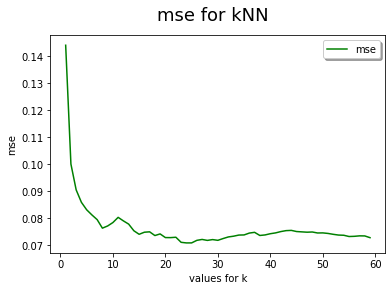

In [184]:
import matplotlib.pyplot as plt
kNN_mse = []
for i in range (1, 60):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(train_data_normalized, train_sln)
  knn_Pred= knn.predict(test_data_normalized)
  knn_mse = metrics.mean_squared_error(test_sln, knn_Pred)
  kNN_mse.append(knn_mse)
print(kNN_mse)

xvals = range(1, 60)
plt.suptitle('mse for kNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('mse')
plt.plot(xvals, kNN_mse, 'g-', label='mse')
plt.legend(loc='upper right', shadow=True)
plt.show()


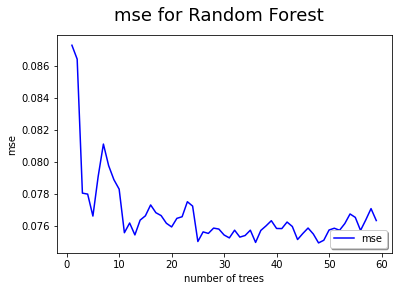

In [169]:
from sklearn.ensemble import RandomForestRegressor
RF_list = []

for i in range (1, 60):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_data_normalized, train_sln)
  n_forest_preds = n_forest.predict(test_data_normalized)
  n_mse=metrics.mean_squared_error(test_sln, n_forest_preds)
  RF_list.append(n_mse)

xvals = range(1, 60)
plt.suptitle('mse for Random Forest', fontsize=18)
plt.xlabel('number of trees')
plt.ylabel('mse')
plt.plot(xvals, RF_list, 'b-', label='mse')
plt.legend(loc='lower right', shadow=True)
plt.show()


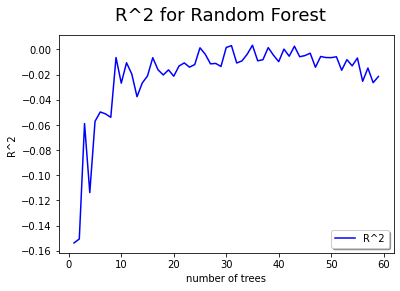

34

In [170]:
from sklearn.ensemble import RandomForestRegressor
RF_list = []

for i in range (1, 60):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_data_normalized, train_sln)
  n_forest_preds = n_forest.predict(test_data_normalized)
  n_R2=metrics.r2_score(test_sln, n_forest_preds)
  RF_list.append(n_R2)

xvals = range(1, 60)
plt.suptitle('R^2 for Random Forest', fontsize=18)
plt.xlabel('number of trees')
plt.ylabel('R^2')
plt.plot(xvals, RF_list, 'b-', label='R^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

RF_list.index(max(RF_list))

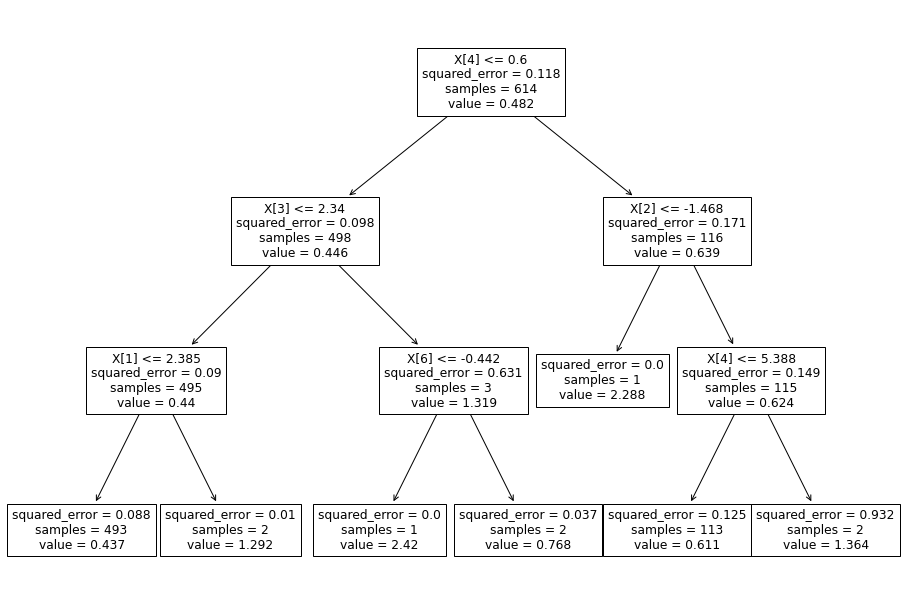

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,11)) # Makes it so the graph isn't tiny
tree.plot_tree(dt);

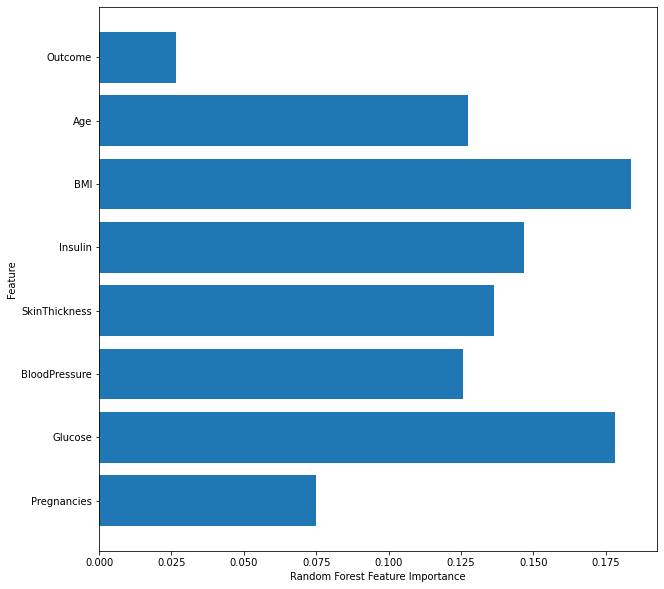

In [172]:
#FEATURE IMPORTANCES CHART
import matplotlib.pyplot as plt

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(10,10)) #making the table a bit bigger so the text is readable
plt.barh(index,R_forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I discovered that Decision Tree was my best model for non-normalized and normalized data because it's closer to zero/less error per mean squared error. In our past assignments, tuning parameters usually helped make better predictions however, the predictions got worse and worse. I thought Random forest would make a much more accurate predictions because the algorithm prevents overfitting by increasing the number of trees. 
All models work fairly well with MSE's between 0.081 and 0.087. Normalizing helped KNN and W-KNN as it dropped down pretty good, however, it didn't do much favor for decision tree and Random forest. The ranges in some attributes of this datasets is huge and contains many zeros which made it hard to determine how much influence they have on patient pedigree function. For example, insulin ranges from 0 to 800. R^2 looks okay except for Decision tree which is less than -7 for normalized and non-normalized data, which is very far away from being a perfect model. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

This datasets looks simple as it is also all numerics like the winequality dataset from the class, however the range in some of the attribute is too big as I mentioned above, and it makes it complex but normalization helped. Also, tuning with parameters made the models worse so I had to try and check around to see what worked best.